# K-Nearest Neighbors Algorithm.
The **k-nearest neighbors (KNN)** algorithm is a simple, easy-to-implement **supervised** machine learning algorithm that can be used to solve both classification and regression problems(k is number of neighbor). **The KNN algorithm assumes that similar things exist in close proximity. In other words, similar things are near to each other.**
* A **supervised machine learning algorithm** (as opposed to an unsupervised machine learning algorithm) is one that relies on labeled input data to learn a function that produces an appropriate output when given new unlabeled data.
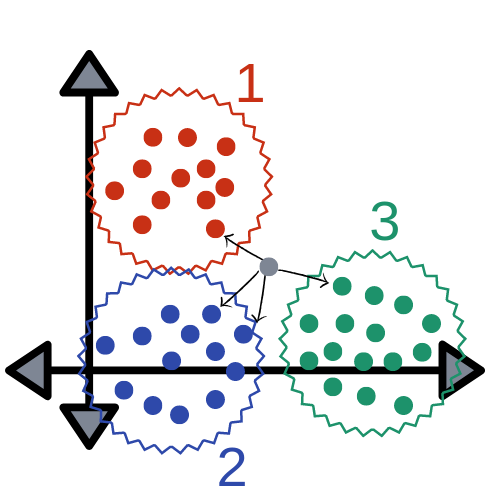
## Math for KNN. 
The KNN algorithm work by finding the distance between the mathematical values of points. The most common way to find this distance is the **Euclidean distance**, as shown below.
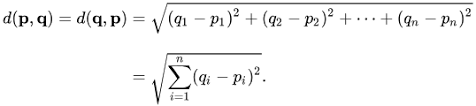
KNN runs this formula to compute the distance between each data point and the test data. It then finds the probability of these points being similar to the test data and classifies it based on which points share the highest probabilities.

In [1]:
# Import important libraries
import numpy as np #linear algebra
import pandas as pd # a data processing and CSV I/O library

import warnings # current version of seaborn generates a bunch of warnings that will be ignore
warnings.filterwarnings('ignore')

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [2]:
#Import data file
df = pd.read_csv('C:\\ABC\\NewData.csv')
df.head(10)

,ID,Sensor1,Sensor2,Sensor3,Sensor4,Compound
0,1,7724200,19702100,24094500,239833,Acetone
1,2,7732180,20105200,23921400,239807,Acetone
2,3,7715400,19960900,23898700,239504,Acetone
3,4,7765770,19935600,23244900,239611,Acetone
4,5,7713900,19939200,23230600,239121,Acetone
5,6,7668770,20131300,23661500,238942,Acetone
6,7,7680430,19891200,24438300,239002,Acetone
7,8,7685920,19946200,23650000,238661,Acetone
8,9,7659660,20084000,23766200,238489,Acetone
9,10,7639480,19950700,23848100,238535,Acetone


In [3]:
#Data Overview
df['Compound'].value_counts()

Acetone       1020
Ethanol        781
Xylene         757
Benzene        737
2-propanol     723
Methanol       659
Toluene        651
Name: Compound, dtype: int64

In [4]:
# Removing Unnecessary Column
df.drop("ID", axis=1, inplace = True)

In [5]:
df.shape

(5328, 5)

### Splitting The Data into Training And Testing Dataset for KNN.
The data we use is split into **training data** and **test data**. The training set contains a known output and the model learns on this data in order to be generalized to other data later on. We have the test dataset (or subset) in order to test our model’s prediction on this subset.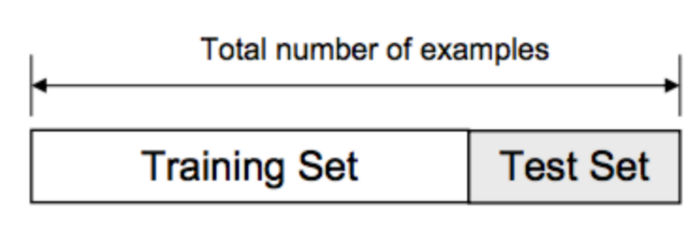

In [6]:
# to split the dataset for training and testing
from sklearn.model_selection import train_test_split 
from sklearn import metrics # for checking the model accuracy
train, test = train_test_split(df, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(3729, 5)
(1599, 5)


In [7]:
X_train = train[['Sensor1','Sensor2','Sensor3','Sensor4']] # taking the training data features
y_train = train.Compound # output of the training data

X_test = test[['Sensor1','Sensor2','Sensor3','Sensor4']] # taking test data feature
y_test = test.Compound # output value of the test data

In [8]:
# View of Our Training Dataset. 
X_train.head()

,Sensor1,Sensor2,Sensor3,Sensor4
2296,4272269,12049300,6288450,312764
5159,4096140,11944100,5333931,324083
762,4333171,14054953,17501393,204591
4210,4630880,10906500,4894830,326480
4473,3969610,11352353,4905451,326266


In [9]:
# View of Our Testing Dataset.
X_test.head()

,Sensor1,Sensor2,Sensor3,Sensor4
4343,4086760,10558600,4818850,312720
1853,4914650,13556600,9050340,329833
3569,5193330,21815189,22632646,315710
2483,6192620,11080800,24223400,230132
3490,5326600,23308832,22643344,326419


In [10]:
y_train.head()

2296    Benzene
5159     Xylene
762     Acetone
4210    Toluene
4473    Toluene
Name: Compound, dtype: object

In [29]:
# Important module for KNN algorithm
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(y_pred, y_test))

The accuracy of KNN is:  0.9987492182614134


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[225   0   0   1   1   0   0]
 [  0 310   0   0   0   0   0]
 [  0   0 218   0   0   0   0]
 [  0   0   0 239   0   0   0]
 [  0   0   0   0 180   0   0]
 [  0   0   0   0   0 212   0]
 [  0   0   0   0   0   0 213]]
              precision    recall  f1-score   support

  2-propanol       1.00      0.99      1.00       227
     Acetone       1.00      1.00      1.00       310
     Benzene       1.00      1.00      1.00       218
     Ethanol       1.00      1.00      1.00       239
    Methanol       0.99      1.00      1.00       180
     Toluene       1.00      1.00      1.00       212
      Xylene       1.00      1.00      1.00       213

    accuracy                           1.00      1599
   macro avg       1.00      1.00      1.00      1599
weighted avg       1.00      1.00      1.00      1599



*** Test Accuracy *** 0.9987492182614134


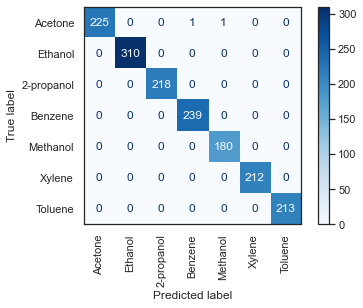

In [36]:
print('*** Test Accuracy ***',classifier.score(X_test,y_test))
disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 display_labels=['Acetone','Ethanol','2-propanol','Benzene','Methanol','Xylene','Toluene'],
                                 xticks_rotation=90,cmap=plt.cm.Blues,
                             values_format='g'
                            )

In [31]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

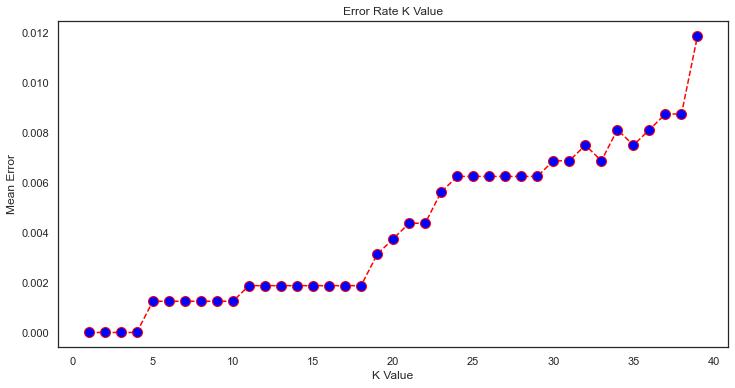

In [32]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the output we can see that the mean error is zero when the value of the K is between 1 and 4.